In [ ]:
## This jupyter notebook is just an example of using the getsoil() function
#  to go get some soil data and then provides a couple sample visualizations

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

def getsoil(q):
    url = "https://sdmdataaccess.sc.egov.usda.gov/tabular/post.rest"
    format = {'query': q, 'format': "json+columnname+metadata" }
    r = requests.post(url = url, data = format)
    if r.ok == True:
        dct = r.json()
        data = dct['Table']
        data[0], data[1] = data[1], data[0]
        data = data[1:]
        df = pd.DataFrame(data[1:], columns= data[0])
    else:
        print(r.status_code)
    return df

    

In [2]:
query = """
SELECT TOP 100\
 sac.saversion, sac.saverest,\
 l.areasymbol, l.areaname, l.lkey,\
 mu.musym, mu.muname, mu.museq, mu.iacornsr, mu.mukey,\
 c.comppct_r, c.compname, c.taxtempregime, c.localphase, c.slope_r, c.cokey,\
 c.taxclname, c.taxorder, c.taxsuborder, c.taxgrtgroup, c.taxsubgrp,\
 c.geomdesc,\
 ch.hzdept_r, ch.hzdepb_r, ch.chkey,\
 ch.sandtotal_r, ch.silttotal_r, ch.claytotal_r,\
 ch.sandvc_r, ch.sandco_r, ch.sandmed_r, ch.sandfine_r, ch.sandvf_r,\
 chtgrp.texdesc, chtgrp.texture, chtgrp.stratextsflag, chtgrp.rvindicator,\
 cht.texcl, cht.lieutex,\
 chtmod.texmod\
 FROM sacatalog sac\
 INNER JOIN legend l ON l.areasymbol = sac.areasymbol\
 AND l.areasymbol LIKE '%IA%'\
 AND l.areaname LIKE '%Dallas%'\
 INNER JOIN mapunit mu ON mu.lkey = l.lkey\
 LEFT OUTER JOIN component c ON c.mukey = mu.mukey\
 LEFT OUTER JOIN chorizon ch ON ch.cokey = c.cokey\
 LEFT OUTER JOIN chtexturegrp chtgrp ON chtgrp.chkey = ch.chkey\
 LEFT OUTER JOIN chtexture cht ON cht.chtgkey = chtgrp.chtgkey\
 LEFT OUTER JOIN chtexturemod chtmod ON chtmod.chtkey = cht.chtkey
"""

df = getsoil(query)

In [11]:
df['iacornsr'] = pd.to_numeric(df['iacornsr'])

<AxesSubplot:xlabel='iacornsr', ylabel='Count'>

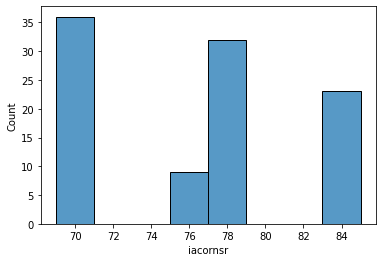

In [17]:
sns.histplot(data= df, x= 'iacornsr')

<AxesSubplot:xlabel='taxorder', ylabel='iacornsr'>

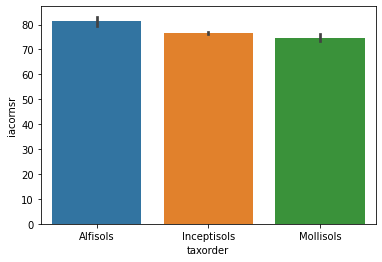

In [19]:
sns.barplot(data=df, x= 'taxorder', y= 'iacornsr')

<AxesSubplot:xlabel='sandmed_r', ylabel='iacornsr'>

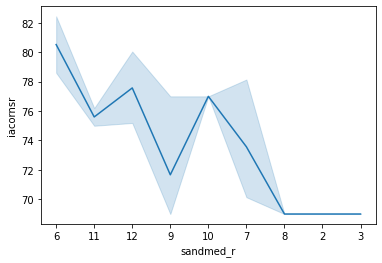

In [18]:
sns.lineplot(data= df, x= 'sandmed_r', y= 'iacornsr')